**Explanatory Model Analysis: Model Dependent - Advanced (70 poin)**

Tim marketing meminta anda sebagai Marketing Researcher untuk meneliti apa yang menyebabkan seseorang tertarik untuk merespon marketing campaign yang sudah dibuat oleh mereka. Insight yang dihasilkan nanti rencananya akan digunakan untuk membuat strategi marketing yang tepat di masa mendatang.
Data yang anda peroleh memiliki metadata sebagai berikut:
* ID: User ID
* Year_Birth: Tahun lahir
* Education: Tingkat pendidikan
* Marital_Status: Status pernikahan
* Income: Besar pendapatan tahunan
* Kidhome: Jumlah anak
* Teenhome: Jumlah anak remaja
* Dt_Customer: Tanggal mereka menjadi customer
* Recency: Jumlah hari terhitung sejak transaksi terakhir
* MntX: Jumlah spending untuk produk X dalam 2 tahun terakhir
* NumDealsPurchases: Jumlah transaksi yang menggunakan voucher
* NumWebPurchases: Jumlah transaksi via web
* NumCatalogPurchases: Jumlah transaksi menggunakan katalog
* NumStorePurchases: Jumlah transaksi langsung di toko
* NumWebVisitMonth: Jumlah kunjungan online dalam 1 bulan terakhir
* AcceptedCmpX: Apakah customer menerima penawaran pada campaign ke-X?
Bernilai 1 jika ya
* Response (target): Apakah customer menerima penawaran terakhir? Bernilai 1
jika ya

1.   Anda merasa yakin bahwa untuk mengetahui faktor apa saja yang dapat
mempengaruhi seseorang untuk merespon suatu campaign dapat diekstrak
langsung dari data tanpa harus membuat model. Analisisnya secara deskriptif
(EDA) apa saja faktor yang membuat seseorang merespon campaign dari tim
marketing. Berikan penjelasan dan alasan mengapa variabel tertentu berasosiasi dengan variabel target (Response)
2.   Dengan begitu banyaknya faktor yang mempengaruhi seseorang untuk merespon campaign, anda berpikir bahwa akan lebih baik menggunakan model machine learning untuk menjelaskan dampak dari tiap variabel sehingga dapat diketahui variabel mana yang memiliki pengaruh terbesar.

a. Buatlah model machine learning untuk masalah campaign marketing
berikut baik menggunakan variabel yang anda pilih pada poin 1 maupun
menggunakan semua variabel yang anda miliki dengan aturan:
> i. Selalu menggunakan model baseline (logistic regression, KNN,
Naive Bayes) sebagai pembanding untuk model yang lebih
kompleks

> ii. Seleksi model terbaik dari sekian banyak model yang anda
gunakan

> iii. Interpretasikan hasil dari model sesuai dengan jenis masing-masing
model

b. Berikan rekomendasi yang berdasarkan hasil interpretasi dari model
terbaik









## Install-Load Package and Import Data

In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install matplotlib

     |████████████████████████████████| 216 kB 8.5 MB/s 
     |████████████████████████████████| 133 kB 11.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=70b7fc0f9521adee82d530b428a6165e132796d86197e1916044fcf07a6ae252
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.ensemble import RandomForestClassifier
# load naive bayes
from sklearn.naive_bayes import GaussianNB
# import seaborn for data visualization
import seaborn as sns

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

In [ ]:
# load customer dataset
data = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv', sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check its first 5 rows
data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
# count 'Response' class frequencies
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

## Simple Explanatory Data Analysis

In [ ]:
# check dataset before we start modeling
data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show(

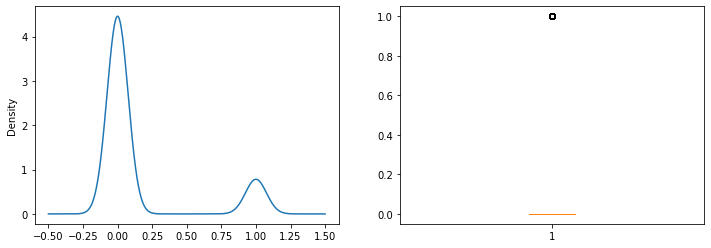

In [ ]:
#Univariate Analysis Response

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
data['Response'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(data['Response'])
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int64
 1   Recency              2240 non-null   int64
 2   MntWines             2240 non-null   int64
 3   MntFruits            2240 non-null   int64
 4   MntMeatProducts      2240 non-null   int64
 5   MntFishProducts      2240 non-null   int64
 6   MntSweetProducts     2240 non-null   int64
 7   MntGoldProds         2240 non-null   int64
 8   NumDealsPurchases    2240 non-null   int64
 9   NumWebPurchases      2240 non-null   int64
 10  NumCatalogPurchases  2240 non-null   int64
 11  NumStorePurchases    2240 non-null   int64
 12  NumWebVisitsMonth    2240 non-null   int64
 13  AcceptedCmp3         2240 non-null   int64
 14  AcceptedCmp4         2240 non-null   int64
 15  AcceptedCmp5         2240 non-null   int64
 16  AcceptedCmp1         224

In [ ]:
data.describe()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

ID                     0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Berdasarkan hasil dari *Explanatory Data Analysis* menunjukkan bahwa data Response pada analisis univariat hanya bernilai 0 atau 1 yang menandakan bahwa faktor respon pada kustomer hanya memiliki keputusan ya (bernilai 1) atau tidak (bernilai 0). Namun, saat dianalisis menggunakan matriks korelasi didapatkan bahwa faktor yang membuat seseorang merespon campaign dari tim
marketing (Response) ini memiliki nilai korelasi tertinggi dengan faktor kustomer yang menerima penawaran pada campaign ke-5 (AcceptedCmp5) sebesar 32,6%. Selain itu, faktor lain yang membuat seseorang merespon campaign dari tim marketing antara lain kustomer yang menerima penawaran pada campaign ke sekian kali (AcceptedCmpX), jumlah spending untuk produk X dalam 2 tahun terakhir (MntX) dan seluruh jumlah transaksi dari berbagai cara pembayaran. Faktor-faktor ini yang memiliki nilai korelasi positif terhadap Response.


## Train-Test Split

In [ ]:
# assign 'Response' column to y 
y = data['Response'].values
# assign all columns except 'Response' to X
x = data.drop(['Response'], axis = 1).values

In [ ]:
# check y dimension
y.shape

(2240,)

In [ ]:
# check X dimension
x.shape

(2240, 19)

In [ ]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
x_train_Response, x_test_Response, y_train_Response, y_test_Response = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
# Check X_train_Response dimension
x_train_Response.shape

(1568, 19)

In [ ]:
# check y_train_Response class distribution
np.unique(y_train_Response, return_counts=True)[1]

array([1334,  234])

In [ ]:
# check X_test_Response dimension
x_test_Response.shape

(672, 19)

In [ ]:
# check y_test_Response class distribution
np.unique(y_test_Response, return_counts=True)[1]

array([572, 100])

## Logistics Regression

In [ ]:
# check data we gonna use
data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


**Train-Test Split**

In [ ]:
y = data['Response'].values
X = data.drop(['Response'], axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.286199
         Iterations 7


In [ ]:
# check summary of model
logistic_reg_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.321     
Dependent Variable: y                AIC:              937.5185  
Date:               2022-04-16 10:08 BIC:              1044.6697 
No. Observations:   1568             Log-Likelihood:   -448.76   
Df Model:           19               LL-Null:          -660.72   
Df Residuals:       1548             LLR p-value:      4.5681e-78
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.0163     0.4287   -7.0365   0.0000   -3.8565   -2.1761
x1        -0.0000     0.0000   -0.2235   0.8231   -0.0001    0.0000
x2        -0.0260     0.0033   -7.9341   0.0000   -0.0324   -0.0196
x3         0.0000     0.0004    0.1001   0.9202   -0.0007    0.0008
x4         0.0029     0.0027    1.0638   0.2874   -0.0024    0.0082
x5         0.0033     0.0006    6.0155   0.0000    0.0023    0.0044
x6        -0.0002     0.0020   -0.1123   0.9106   -0.0042    0.0038
x7        -0.0017     0.0025   -0.6678   0.5043   -0.0066    0.0033
x8         0.0006     0.0017    0.3387   0.7349   -0.0027    0.0039
x9         0.1049     0.0475    2.2100   0.0271    0.0119    0.1979
x10        0.0751     0.0349    2.1515   0.0314    0.0067    0.1435
x11        0.0793     0.0476    1.6644   0.0960   -0.0141    0.1727
x12       -0.1506     0.0383   -3.9325   0.0001   -0.2257   -0.0756
x13        0.1908     0.0474    4.0213   0.0001    0.0978    0.2837
x14        1.7701     0.2513    7.0447   0.0000    1.2777    2.2626
x15        0.9487     0.3120    3.0409   0.0024    0.3372    1.5601
x16        1.4823     0.3134    4.7297   0.0000    0.8681    2.0966
x17        1.2908     0.3110    4.1509   0.0000    0.6813    1.9003
x18        0.9153     0.6057    1.5111   0.1308   -0.2719    2.1024
x19       -0.8731     1.2869   -0.6785   0.4975   -3.3954    1.6492
=================================================================

"""

In [ ]:
# check model coefficient
logistic_reg_sm.params

array([-3.01629114e+00, -6.21541273e-06, -2.60056190e-02,  3.88463690e-05,
        2.89492702e-03,  3.34660419e-03, -2.28692468e-04, -1.68409782e-03,
        5.72047246e-04,  1.04899342e-01,  7.50699743e-02,  7.92964881e-02,
       -1.50641354e-01,  1.90750531e-01,  1.77013870e+00,  9.48656700e-01,
        1.48233354e+00,  1.29080759e+00,  9.15253626e-01, -8.73116481e-01])

**Modeling using Scikit-Learn**

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(
  penalty='l2', *, dual=False, 
  tol=0.0001, C=1.0, 
  fit_intercept=True, intercept_scaling=1, 
  class_weight=None, random_state=None, 
  solver='lbfgs', max_iter=100, 
  multi_class='auto', verbose=0, 
  warm_start=False, n_jobs=None,
  l1_ratio=None
)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1000)

In [ ]:
# check model coefficient
logistic_reg.coef_

array([[-6.88672282e-05, -2.47504842e-02,  1.63071046e-03,
         6.83373263e-05,  2.08745862e-03, -2.18934105e-03,
        -4.40972787e-04,  3.14522715e-03, -2.81098451e-02,
        -2.07680410e-02,  1.72533452e-02, -1.55568361e-01,
        -5.39439133e-02,  1.31064905e-02,  6.92674792e-03,
         1.24874345e-02,  1.27217568e-02,  3.57708963e-03,
        -4.74021040e-04]])

In [ ]:
logistic_reg.intercept_

array([-0.01815863])

In [ ]:
logistic_reg.score(X_train, y_train)

0.8647959183673469

### Classification Evaluation Metrics

In [ ]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

**Accuracy**

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8482142857142857

**Confusion Matrix**

In [ ]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

array([[556,  16],
       [ 86,  14]])

**Plot Confusion Matrix using Scikit-Plot**

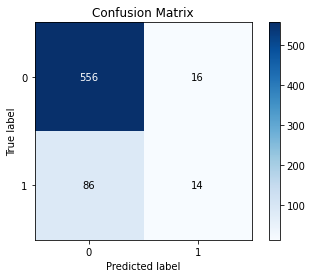

In [ ]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

**Precision**

$$Precision = \frac{\text{True Positive}}{\text{True Positve} + \text{False Positive}}$$

In [ ]:
# check model precision
metrics.precision_score(y_test, pred_result)

0.4666666666666667

**Recall**

$$Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
# check model recall
metrics.recall_score(y_test, pred_result)

0.14

**F1-Score**

$$F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
# check f1_score
metrics.f1_score(y_test, pred_result)

0.2153846153846154

**Classification Report**

In [ ]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.866044,0.466667,0.848214,0.666355,0.806613
recall,0.972028,0.140000,0.848214,0.556014,0.848214
f1-score,0.915980,0.215385,0.848214,0.565682,0.811725
support,572.000000,100.000000,0.848214,672.000000,672.000000


**ROC-AUC Curve**

$$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{False Negative}}$$

In [ ]:
# generate probability prediction
pred_proba_result = logistic_reg.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.936153,0.063847
1,0.888513,0.111487
2,0.941082,0.058918
3,0.852366,0.147634
4,0.974723,0.025277


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.7461888111888112

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.0638467 , 0.11148727, 0.05891793, 0.14763376, 0.02527727,
       0.06626517, 0.12489028, 0.03974256, 0.03500386, 0.50339361])

**ROC Curve**

**ROC Curve Using Scikit-Learn**

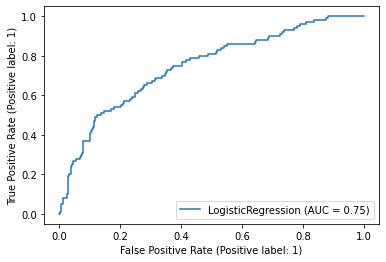

In [ ]:
metrics.RocCurveDisplay.from_estimator(logistic_reg, X_test, y_test)

**ROC Curve From Scikit-Plot**

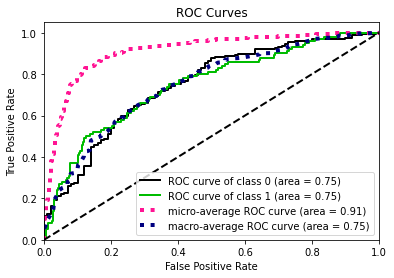

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

**Handle Imbalance Class Dataset with G-Means**

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

where

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [ ]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# see gmeans result
gmeans

array([0.        , 0.        , 0.        , 0.09982502, 0.09964974,
       0.22282358, 0.22223436, 0.2811067 , 0.27935991, 0.29630593,
       0.2960403 , 0.31205388, 0.31177363, 0.36889554, 0.36856365,
       0.42936365, 0.42897666, 0.44012077, 0.43852901, 0.48038446,
       0.47951024, 0.48939809, 0.48895135, 0.4986345 , 0.4981785 ,
       0.50766847, 0.50533863, 0.51461167, 0.51127155, 0.52032131,
       0.51934601, 0.52822436, 0.5267329 , 0.53543982, 0.5349335 ,
       0.54349298, 0.54297806, 0.58385924, 0.57661297, 0.60698153,
       0.60579948, 0.61314277, 0.6125437 , 0.61979299, 0.61797096,
       0.62511537, 0.6244998 , 0.63853526, 0.63790523, 0.6448017 ,
       0.64352613, 0.65707553, 0.65511703, 0.66176813, 0.65712874,
       0.6636675 , 0.65962481, 0.66606033, 0.65712874, 0.6634172 ,
       0.65991629, 0.66611282, 0.65611699, 0.66216428, 0.65925366,
       0.66521988, 0.66448361, 0.67039024, 0.66216428, 0.66794749,
       0.66414149, 0.66984238, 0.66598158, 0.67717533, 0.67243

In [ ]:
# find the best threshold
ix = np.argmax(gmeans)

In [ ]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.14207328277565268, G-Mean=0.6871701370132416


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

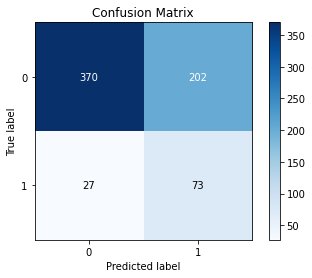

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.3893333333333333

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.2153846153846154

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.931990,0.265455,0.659226,0.598722,0.832803
recall,0.646853,0.730000,0.659226,0.688427,0.659226
f1-score,0.763674,0.389333,0.659226,0.576504,0.707968
support,572.000000,100.000000,0.659226,672.000000,672.000000


In [ ]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.866044,0.466667,0.848214,0.666355,0.806613
recall,0.972028,0.140000,0.848214,0.556014,0.848214
f1-score,0.915980,0.215385,0.848214,0.565682,0.811725
support,572.000000,100.000000,0.848214,672.000000,672.000000


Dari hasil model evaluation menunjukkan bahwa model Logistic Regression yang telah ditreshold memiliki peningkatan nilai evaluasi Response F1-Score dari 0.215 menjadi 0.389. Hal ini menunjukkan bahwa model Logistic Regression cukup layak dijadikan pilihan model baseline Machine Learning.

## K-Nearest Neighbors

In [ ]:
# check data we gonna use
data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


**Train-Test Split**

In [ ]:
y = data['Response'].values
X = data.drop(['Response'], axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

KNeighborsClassifier param:

```python
sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5, 
  *, 
  weights='uniform', 
  algorithm='auto', 
  leaf_size=30, 
  p=2, 
  metric='minkowski', 
  metric_params=None, 
  n_jobs=None
)
```

For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# prediction
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.858044,0.263158,0.824405,0.560601,0.769519
recall,0.951049,0.100000,0.824405,0.525524,0.824405
f1-score,0.902156,0.144928,0.824405,0.523542,0.789473
support,572.000000,100.000000,0.824405,672.000000,672.000000


### Classification Evaluation Metrics

In [ ]:
# predict
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

**Accuracy**

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8244047619047619

**Confusion Matrix**

In [ ]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

array([[544,  28],
       [ 90,  10]])

**Plot Confusion Matrix using Scikit-Plot**

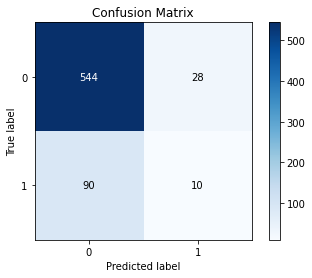

In [ ]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

**Precision**

$$Precision = \frac{\text{True Positive}}{\text{True Positve} + \text{False Positive}}$$

In [ ]:
# check model precision
metrics.precision_score(y_test, pred_result)

0.2631578947368421

**Recall**

$$Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
# check model recall
metrics.recall_score(y_test, pred_result)

0.1

**F1-Score**

$$F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
# check f1_score
metrics.f1_score(y_test, pred_result)

0.14492753623188404

**Classification Report**

In [ ]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.858044,0.263158,0.824405,0.560601,0.769519
recall,0.951049,0.100000,0.824405,0.525524,0.824405
f1-score,0.902156,0.144928,0.824405,0.523542,0.789473
support,572.000000,100.000000,0.824405,672.000000,672.000000


**ROC-AUC Curve**

$$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{False Negative}}$$

In [ ]:
# generate probability prediction
pred_proba_result = knn_clf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.666667,0.333333
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.5383566433566433

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33333333])

**ROC Curve**

**ROC Curve Using Scikit-Learn**

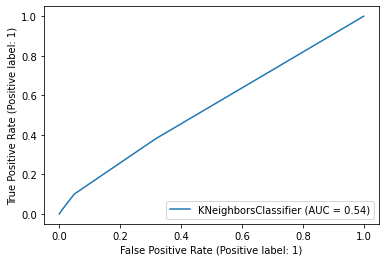

In [ ]:
metrics.RocCurveDisplay.from_estimator(knn_clf, X_test, y_test)

**ROC Curve From Scikit-Plot**

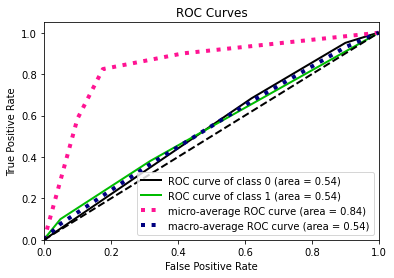

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

**Handle Imbalance Class Dataset with G-Means**

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

where

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [ ]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# see gmeans result
gmeans

array([0.        , 0.1408019 , 0.30839082, 0.50966189, 0.        ])

In [ ]:
# find the best threshold
ix = np.argmax(gmeans)

In [ ]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.3333333333333333, G-Mean=0.5096618925868842


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

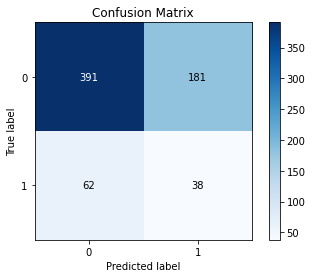

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.23824451410658304

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.14492753623188404

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.863135,0.173516,0.638393,0.518325,0.760513
recall,0.683566,0.380000,0.638393,0.531783,0.638393
f1-score,0.762927,0.238245,0.638393,0.500586,0.684849
support,572.000000,100.000000,0.638393,672.000000,672.000000


In [ ]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['Not Response','Response'], output_dict=True))

,Not Response,Response,accuracy,macro avg,weighted avg
precision,0.858044,0.263158,0.824405,0.560601,0.769519
recall,0.951049,0.100000,0.824405,0.525524,0.824405
f1-score,0.902156,0.144928,0.824405,0.523542,0.789473
support,572.000000,100.000000,0.824405,672.000000,672.000000


Dari hasil model evaluation menunjukkan bahwa model K-Nearest Neighbors yang telah ditreshold memiliki peningkatan nilai evaluasi Response F1-Score dari 0.145 menjadi 0.238 meskipun tidak begitu signifikan. Namun hasil ini tergolong rendah dibanding nilai F1 Score pada Logistic Regression. Hal ini menunjukkan bahwa model K-Nearest Neighbors tidak cukup layak dijadikan pilihan model baseline Machine Learning dibanding Logistic Regression.

## Naive Bayes

In [ ]:
# check data we gonna use
data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


**Train-Test Split**

In [ ]:
y = data['Response'].values
X = data.drop(['Response'], axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

GaussianNB param:

```python
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
```

For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
# define Naive Bayes Gaussian
clf_pf = GaussianNB()
# fit model to data
clf_pf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# prediction
pred_result = clf_pf.predict(X_test)
pred_proba_result = clf_pf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892139,0.328000,0.787202,0.610069,0.808190
recall,0.853147,0.410000,0.787202,0.631573,0.787202
f1-score,0.872207,0.364444,0.787202,0.618326,0.796647
support,572.000000,100.000000,0.787202,672.000000,672.000000


### Classification Evaluation Metrics

In [ ]:
# predict
pred_result = clf_pf.predict(X_test)
pred_proba_result = clf_pf.predict_proba(X_test)

**Accuracy**

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.7872023809523809

**Confusion Matrix**

In [ ]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

array([[488,  84],
       [ 59,  41]])

**Plot Confusion Matrix using Scikit-Plot**

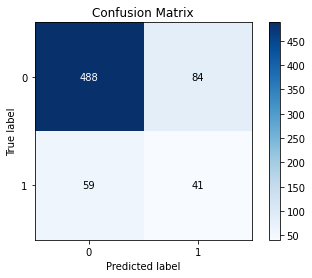

In [ ]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

**Precision**

$$Precision = \frac{\text{True Positive}}{\text{True Positve} + \text{False Positive}}$$

In [ ]:
# check model precision
metrics.precision_score(y_test, pred_result)

0.328

**Recall**

$$Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
# check model recall
metrics.recall_score(y_test, pred_result)

0.41

**F1-Score**

$$F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [ ]:
# check f1_score
metrics.f1_score(y_test, pred_result)

0.3644444444444444

**Classification Report**

In [ ]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892139,0.328000,0.787202,0.610069,0.808190
recall,0.853147,0.410000,0.787202,0.631573,0.787202
f1-score,0.872207,0.364444,0.787202,0.618326,0.796647
support,572.000000,100.000000,0.787202,672.000000,672.000000


**ROC-AUC Curve**

$$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{False Negative}}$$


In [ ]:
# generate probability prediction
pred_proba_result = clf_pf.predict_proba(X_test)

In [ ]:
# check result
pd.DataFrame(pred_proba_result).head()

,0,1
0,0.999943,0.000057
1,0.999938,0.000062
2,0.999983,0.000017
3,0.999620,0.000380
4,0.999989,0.000011


In [ ]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.7176923076923076

In [ ]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([5.67086584e-05, 6.20962739e-05, 1.70289946e-05, 3.79861865e-04,
       1.05884407e-05, 6.61950248e-04, 1.32593914e-04, 5.00328414e-05,
       1.69802876e-04, 9.97731490e-01])

**ROC Curve**

**ROC Curve Using Scikit-Learn**

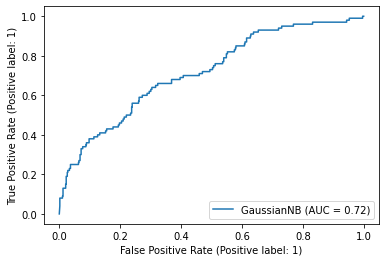

In [ ]:
metrics.RocCurveDisplay.from_estimator(clf_pf, X_test, y_test)

**ROC Curve From Scikit-Plot**

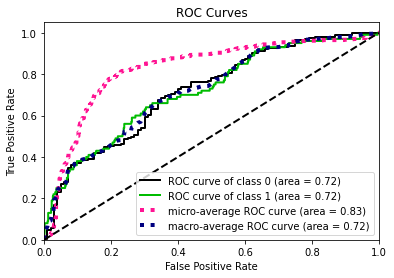

In [ ]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

**Handle Imbalance Class Dataset with G-Means**

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

where

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [ ]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# see gmeans result
gmeans

array([0.        , 0.1998251 , 0.22341125, 0.26434376, 0.28259536,
       0.28135536, 0.29842243, 0.29815868, 0.35834214, 0.35675303,
       0.38321423, 0.38287192, 0.43090813, 0.43013659, 0.45220903,
       0.45180292, 0.46243503, 0.46118576, 0.47155078, 0.4706973 ,
       0.49073585, 0.48401006, 0.49359534, 0.49313469, 0.50252857,
       0.50158839, 0.52872058, 0.52772768, 0.55348546, 0.55191973,
       0.56021974, 0.55702758, 0.5651598 , 0.5646182 , 0.57262736,
       0.56987301, 0.58548886, 0.58036039, 0.58794712, 0.58387421,
       0.5913124 , 0.5889424 , 0.59625873, 0.58960992, 0.59675697,
       0.59552527, 0.60257315, 0.59504069, 0.60192   , 0.59549591,
       0.6022249 , 0.60091713, 0.6075573 , 0.6049042 , 0.61144389,
       0.60942481, 0.61587393, 0.61450987, 0.62087802, 0.6181124 ,
       0.62438781, 0.61876258, 0.62491958, 0.62349119, 0.64156714,
       0.64083097, 0.65259032, 0.64352613, 0.64924647, 0.64847859,
       0.65975732, 0.65505031, 0.66057826, 0.65339351, 0.65881

In [ ]:
# find the best threshold
ix = np.argmax(gmeans)

In [ ]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.007957745771924011, G-Mean=0.6682353339493966


In [ ]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

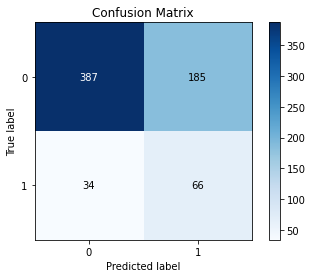

In [ ]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [ ]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.37606837606837606

In [ ]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.3644444444444444

In [ ]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.919240,0.262948,0.674107,0.591094,0.821577
recall,0.676573,0.660000,0.674107,0.668287,0.674107
f1-score,0.779456,0.376068,0.674107,0.577762,0.719428
support,572.000000,100.000000,0.674107,672.000000,672.000000


In [ ]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.892139,0.328000,0.787202,0.610069,0.808190
recall,0.853147,0.410000,0.787202,0.631573,0.787202
f1-score,0.872207,0.364444,0.787202,0.618326,0.796647
support,572.000000,100.000000,0.787202,672.000000,672.000000


Dari hasil model evaluation menunjukkan bahwa model Naive Bayes yang telah ditreshold memiliki peningkatan nilai evaluasi Response F1-Score dari 0.364 menjadi 0.376 meskipun tidak begitu signifikan. Namun hasil ini tergolong lebih tinggi dibanding nilai F1 Score pada Logistic Regression dan KNN. Hal ini menunjukkan bahwa model Naive Bayes paling layak dijadikan pilihan model baseline Machine Learning dibanding Logistic Regression dan K-Nearest Neighbors pada kasus ini.

**Jawaban**

Dari ketiga model Machine Learning yang digunakan, model Naive Bayes memiliki nilai F1-Score yang tinggi dibanding lainnya saat model evaluation. Sehingga dapat disimpulkan bahwa hasil interpretasi dari model
terbaik ada pada Naive Bayes.